# Step 1: MongoDB connection

In [ ]:
#pip install pymongo
import pandas as pd
import pymongo

# Create connections
client = pymongo.MongoClient('localhost', 27017)

# Check for successful connection
if client:
    print("Successful connection to MongoDB")

Successful connection to MongoDB


# Step 2: Import data

In [ ]:
# Chọn cơ sở dữ liệu
db = client['DO_AN']

# Chọn bảng
collection = db['data']
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'DO_AN'), 'data')

# Step 3: Convert to data frame

In [ ]:
data = list(collection.find())
df = pd.json_normalize(data)
print(df.shape)
df

(10000, 68)


,_id,st,ts,elevation,callLetters,qualityControlProcess,dataSource,type,sections,position.type,...,skyConditionObservation.midCloudGenus.quality,skyConditionObservation.highCloudGenus.value,skyConditionObservation.highCloudGenus.quality,atmosphericPressureObservation.altimeterSetting.value,atmosphericPressureObservation.altimeterSetting.quality,atmosphericPressureObservation.stationPressure.value,atmosphericPressureObservation.stationPressure.quality,skyCoverLayer,liquidPrecipitation,extremeAirTemperature
0,5553a998e4b02cf7151190b8,x+47600-047900,1984-03-05 13:00:00,9999,VCSZ,V020,4,FM-13,[AG1],Point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5553a998e4b02cf7151190b9,x+45200-066500,1984-03-05 14:00:00,9999,VC81,V020,4,FM-13,[AG1],Point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5553a998e4b02cf7151190ba,x+51900+003600,1984-03-05 14:00:00,9999,PLAT,V020,4,FM-13,"[AG1, MD1, OA1, SA1, UA1]",Point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5553a998e4b02cf7151190bb,x+60900-005300,1984-03-05 15:00:00,9999,TFRB,V020,4,FM-13,"[AG1, AY1, GF1, MW1]",Point,...,9,99,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5553a998e4b02cf7151190bc,x+66300-025200,1984-03-05 15:00:00,9999,TFBY,V020,4,FM-13,"[AG1, AY1, GF1, MW1]",Point,...,1,02,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5553a99ae4b02cf715120fab,x+65100-026300,1984-03-12 12:00:00,9999,TFJA,V020,4,FM-13,"[AG1, AY1, GF1, MD1, MW1, SA1]",Point,...,1,99,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,5553a99ae4b02cf715120fac,x-42600-056000,1984-03-12 12:00:00,9999,EORJ,V020,4,FM-13,"[AG1, AY1, GF1, MD1, MW1, SA1]",Point,...,9,99,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,5553a99ae4b02cf715120fad,x+13100+043000,1984-03-12 12:00:00,9999,FAAA,V020,4,FM-13,"[AG1, GF1, MD1, SA1, UA1]",Point,...,1,00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,5553a99ae4b02cf715120fae,x+32200+133600,1984-03-12 12:00:00,9999,BPYO,V020,4,FM-13,"[AG1, AY1, GF1, MW1, SA1, UA1]",Point,...,1,00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 4: Explore data

## 4.1 Check data type and number of null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 68 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   _id                                                      10000 non-null  object        
 1   st                                                       10000 non-null  object        
 2   ts                                                       10000 non-null  datetime64[ns]
 3   elevation                                                10000 non-null  int64         
 4   callLetters                                              10000 non-null  object        
 5   qualityControlProcess                                    10000 non-null  object        
 6   dataSource                                               10000 non-null  object        
 7   type                                              

## 4.2 Check the number of unique rows

In [ ]:
if len(df.drop_duplicates(subset=['st','ts']))==len(df):
    print("Each row is uniquely identified by 'st' and 'ts'")

Each row is uniquely identified by 'st' and 'ts'


## 4.3 Descriptive statistics

In [ ]:
df.describe(include='all')

,_id,st,ts,elevation,callLetters,qualityControlProcess,dataSource,type,sections,position.type,...,skyConditionObservation.midCloudGenus.quality,skyConditionObservation.highCloudGenus.value,skyConditionObservation.highCloudGenus.quality,atmosphericPressureObservation.altimeterSetting.value,atmosphericPressureObservation.altimeterSetting.quality,atmosphericPressureObservation.stationPressure.value,atmosphericPressureObservation.stationPressure.quality,skyCoverLayer,liquidPrecipitation,extremeAirTemperature
count,10000,10000,10000,10000.0,10000,10000,10000,10000,10000,9994,...,9437,9437,9437,60.000000,60,60.000000,60,741,105,7
unique,10000,8417,NaN,NaN,2649,1,1,2,224,1,...,2,11,2,NaN,2,NaN,2,66,24,7
top,5553a998e4b02cf7151190b8,x+52200+004200,NaN,NaN,PLAT,V020,4,FM-13,"[AG1, AY1, GF1, MD1, MW1, SA1, UA1, UG1]",Point,...,1,99,1,NaN,9,NaN,1,"[{'coverage': {'value': '09', 'quality': '1'},...","[{'period': 6, 'depth': 0, 'condition': '9', '...","[{'period': 99.9, 'code': 'N', 'value': -30.4,..."
freq,1,61,NaN,NaN,528,10000,10000,9994,3198,9994,...,5956,4237,5200,NaN,54,NaN,54,661,66,1
mean,NaN,NaN,1984-03-09 05:46:20.280000,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9101.500000,NaN,1909.613333,NaN,NaN,NaN,NaN
min,NaN,NaN,1984-03-05 12:00:00,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1015.900000,NaN,703.800000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1984-03-07 12:00:00,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9999.900000,NaN,1012.025000,NaN,NaN,NaN,NaN
50%,NaN,NaN,1984-03-08 12:00:00,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9999.900000,NaN,1020.800000,NaN,NaN,NaN,NaN
75%,NaN,NaN,1984-03-12 00:00:00,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9999.900000,NaN,1026.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,1984-03-13 18:00:00,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9999.900000,NaN,9999.900000,NaN,NaN,NaN,NaN


# Step 5: Data processing

## 5.1 Delete columns containing null values above 70%

In [ ]:
# Delete columns containing null values above 70%
df.drop(['atmosphericPressureObservation.altimeterSetting.value',
        'atmosphericPressureObservation.altimeterSetting.quality',
        'atmosphericPressureObservation.stationPressure.value',
        'atmosphericPressureObservation.stationPressure.quality',
         'skyCoverLayer',
         'liquidPrecipitation',
         'extremeAirTemperature'], axis=1, inplace=True)
df.shape

(10000, 61)

## 5.2 Delete rows containing null elements in columns 'position.coordinates'

In [ ]:
df.dropna(subset=['position.coordinates'], inplace=True)
df.shape

(9994, 61)

## 5.3 Handle columns containing data is list or dictionary

In [ ]:
# Check if any cell is a list or dictionary
is_list_or_dict = df.applymap(lambda x: isinstance(x, (list, dict)))

# Display the sum of True values in each column
sum_true_values = is_list_or_dict.sum(axis=0)

# Print the result
print(sum_true_values[sum_true_values>0])

sections                           9994
position.coordinates               9994
pastWeatherObservationManual       9036
presentWeatherObservationManual    9100
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22500\4144457.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  is_list_or_dict = df.applymap(lambda x: isinstance(x, (list, dict)))


### 5.3.1 Split the 'position.coordinates' column

In [ ]:
df[['position.coordinates']]

,position.coordinates
0,"[-47.9, 47.6]"
1,"[-66.5, 45.2]"
2,"[3.6, 51.9]"
3,"[-5.3, 60.9]"
4,"[-25.2, 66.3]"
...,...
9995,"[-26.3, 65.1]"
9996,"[-56, -42.6]"
9997,"[43, 13.1]"
9998,"[133.6, 32.2]"


In [ ]:
df[['coordinates_long','coordinates_lat']] = df['position.coordinates'].apply(pd.Series)

# Remove position.coordinates column
df.drop(['position.coordinates'], axis=1, inplace=True)

# Check the number of columns
len(df.columns)

62

### 5.3.2 Split the 'pastWeatherObservationManual' column

In [ ]:
df[['pastWeatherObservationManual']]

,pastWeatherObservationManual
0,NaN
1,NaN
2,NaN
3,"[{'atmosphericCondition': {'value': '0', 'qual..."
4,"[{'atmosphericCondition': {'value': '0', 'qual..."
...,...
9995,"[{'atmosphericCondition': {'value': '6', 'qual..."
9996,"[{'atmosphericCondition': {'value': '0', 'qual..."
9997,NaN
9998,"[{'atmosphericCondition': {'value': '0', 'qual..."


In [ ]:
df['pastWeatherObservationManual'].apply(pd.Series)

,0
0,NaN
1,NaN
2,NaN
3,"{'atmosphericCondition': {'value': '0', 'quali..."
4,"{'atmosphericCondition': {'value': '0', 'quali..."
...,...
9995,"{'atmosphericCondition': {'value': '6', 'quali..."
9996,"{'atmosphericCondition': {'value': '0', 'quali..."
9997,NaN
9998,"{'atmosphericCondition': {'value': '0', 'quali..."


In [ ]:
# Split column pastWeatherObservationManual
df['pastWeatherObservationManual'] = df['pastWeatherObservationManual'].apply(pd.Series)

df['pastWeatherObservationManual'].apply(pd.Series)

,0,atmosphericCondition,period
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,"{'value': '0', 'quality': '1'}","{'value': 3, 'quality': '1'}"
4,NaN,"{'value': '0', 'quality': '1'}","{'value': 3, 'quality': '1'}"
...,...,...,...
9995,NaN,"{'value': '6', 'quality': '1'}","{'value': 6, 'quality': '1'}"
9996,NaN,"{'value': '0', 'quality': '1'}","{'value': 6, 'quality': '1'}"
9997,NaN,NaN,NaN
9998,NaN,"{'value': '0', 'quality': '1'}","{'value': 6, 'quality': '1'}"


In [ ]:
# Get the unique values of the first column when splitting column pastWeatherObservationManual
df['pastWeatherObservationManual'].apply(pd.Series)[0].unique()

array([nan])

In [ ]:
df[['pastWeatherObservationManual.0',
    'pastWeatherObservationManual.atmosphericCondition',
    'pastWeatherObservationManual.period']] = df['pastWeatherObservationManual'].apply(pd.Series)

# Remove pastWeatherObservationManual and pastWeatherObservationManual_0 columns
df.drop(['pastWeatherObservationManual'], axis=1, inplace=True)
df.drop(['pastWeatherObservationManual.0'], axis=1, inplace=True)

len(df.columns)

63

In [ ]:
df['pastWeatherObservationManual.atmosphericCondition'].apply(pd.Series)

,0,value,quality
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,0,1
4,NaN,0,1
...,...,...,...
9995,NaN,6,1
9996,NaN,0,1
9997,NaN,NaN,NaN
9998,NaN,0,1


In [ ]:
# Get the unique values of the first column when splitting column pastWeatherObservationManual_atmosphericCondition
df['pastWeatherObservationManual.atmosphericCondition'].apply(pd.Series)[0].unique()

array([nan])

In [ ]:
# Split column pastWeatherObservationManual_atmosphericCondition
df[['pastWeatherObservationManual.atmosphericCondition.0',
    'pastWeatherObservationManual.atmosphericCondition.value',
    'pastWeatherObservationManual.atmosphericCondition.quality']] = df['pastWeatherObservationManual.atmosphericCondition'].apply(pd.Series)

# Remove columns pastWeatherObservationManual và pastWeatherObservationManual_0
df.drop(['pastWeatherObservationManual.atmosphericCondition'], axis=1, inplace=True)
df.drop(['pastWeatherObservationManual.atmosphericCondition.0'], axis=1, inplace=True)

len(df.columns)

64

In [ ]:
# Split column pastWeatherObservationManual_period
df[['pastWeatherObservationManual.period.0',
    'pastWeatherObservationManual.period.value',
    'pastWeatherObservationManual.period.quality']] = df['pastWeatherObservationManual.period'].apply(pd.Series)

# Remove columns pastWeatherObservationManual and pastWeatherObservationManual_0
df.drop(['pastWeatherObservationManual.period'], axis=1, inplace=True)
df.drop(['pastWeatherObservationManual.period.0'], axis=1, inplace=True)

len(df.columns)

65

### 5.3.3 Split the column 'presentWeatherObservationManual'

In [ ]:
df['presentWeatherObservationManual']

0                                         NaN
1                                         NaN
2                                         NaN
3       [{'condition': '02', 'quality': '1'}]
4       [{'condition': '02', 'quality': '1'}]
                        ...                  
9995    [{'condition': '63', 'quality': '1'}]
9996    [{'condition': '01', 'quality': '1'}]
9997                                      NaN
9998    [{'condition': '02', 'quality': '1'}]
9999    [{'condition': '02', 'quality': '1'}]
Name: presentWeatherObservationManual, Length: 9994, dtype: object

In [ ]:
df['presentWeatherObservationManual'].apply(pd.Series)

,0
0,NaN
1,NaN
2,NaN
3,"{'condition': '02', 'quality': '1'}"
4,"{'condition': '02', 'quality': '1'}"
...,...
9995,"{'condition': '63', 'quality': '1'}"
9996,"{'condition': '01', 'quality': '1'}"
9997,NaN
9998,"{'condition': '02', 'quality': '1'}"


In [ ]:
# Split the column presentWeatherObservationManual
df['presentWeatherObservationManual'] = df['presentWeatherObservationManual'].apply(pd.Series)
# Continue splitting the column presentWeatherObservationManual
df['presentWeatherObservationManual'].apply(pd.Series)

,0,condition,quality
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,02,1
4,NaN,02,1
...,...,...,...
9995,NaN,63,1
9996,NaN,01,1
9997,NaN,NaN,NaN
9998,NaN,02,1


In [ ]:
# Get the unique values of the first column when splitting column presentWeatherObservationManual
df['presentWeatherObservationManual'].apply(pd.Series)[0].unique()

array([nan])

In [ ]:
# Split the column presentWeatherObservationManual
df[['presentWeatherObservationManual.0',
    'presentWeatherObservationManual.condition',
    'presentWeatherObservationManual.quality']] = df['presentWeatherObservationManual'].apply(pd.Series)

# Remove columns pastWeatherObservationManual and pastWeatherObservationManual_0
df.drop(['presentWeatherObservationManual'], axis=1, inplace=True)
df.drop(['presentWeatherObservationManual.0'], axis=1, inplace=True)

len(df.columns)

66

### 5.3.4 Split the column 'sections'

In [ ]:
sections_df = pd.json_normalize(data, record_path='sections', meta=['_id'], record_prefix='sections.')
sections_df

,sections.0,_id
0,AG1,5553a998e4b02cf7151190b8
1,AG1,5553a998e4b02cf7151190b9
2,AG1,5553a998e4b02cf7151190ba
3,MD1,5553a998e4b02cf7151190ba
4,OA1,5553a998e4b02cf7151190ba
...,...,...
68379,AY1,5553a99ae4b02cf715120faf
68380,GF1,5553a99ae4b02cf715120faf
68381,MW1,5553a99ae4b02cf715120faf
68382,SA1,5553a99ae4b02cf715120faf


# Step 6: Switch data

## 6.1 Create table station_df

### 6.1.1 Get the necessary columns

In [ ]:
station_df = df.drop_duplicates(subset=['st',
                                        'coordinates_long',
                                        'coordinates_lat'])[['st',
                                        'coordinates_long',
                                        'coordinates_lat']]

# Check the result:
if station_df['st'].nunique()==df['st'].nunique():
    print('The result is correct')

# Assuming station_df is your DataFrame
station_df.reset_index(drop=True, inplace=True)

station_df

The result is correct


,st,coordinates_long,coordinates_lat
0,x+47600-047900,-47.9,47.6
1,x+45200-066500,-66.5,45.2
2,x+51900+003600,3.6,51.9
3,x+60900-005300,-5.3,60.9
4,x+66300-025200,-25.2,66.3
...,...,...,...
8406,x+46400+154500,154.5,46.4
8407,x+65100-026300,-26.3,65.1
8408,x-42600-056000,-56.0,-42.6
8409,x+13100+043000,43.0,13.1


### 6.1.2 Create column station_ID

In [ ]:
# Create column stationID
station_ID = []
for i in range(10000, 10000+len(station_df)):
    station_ID.append('ST' + str(i))

# Insert data to atmospher_df
station_df['station_ID'] = station_ID

station_df

,st,coordinates_long,coordinates_lat,station_ID
0,x+47600-047900,-47.9,47.6,ST10000
1,x+45200-066500,-66.5,45.2,ST10001
2,x+51900+003600,3.6,51.9,ST10002
3,x+60900-005300,-5.3,60.9,ST10003
4,x+66300-025200,-25.2,66.3,ST10004
...,...,...,...,...
8406,x+46400+154500,154.5,46.4,ST18406
8407,x+65100-026300,-26.3,65.1,ST18407
8408,x-42600-056000,-56.0,-42.6,ST18408
8409,x+13100+043000,43.0,13.1,ST18409


### 6.1.3 Fill 'station_ID' based on matching values in the station table into df table

In [ ]:
# Create a new column 'station_ID' in df
df['station_ID'] = ''

# Fill 'station_ID' based on matching values in the station table into df table
for index, row in df.iterrows():
    match_row = station_df[(station_df['st'] == row['st'])]
    if not match_row.empty:
        df.at[index, 'station_ID'] = match_row['station_ID'].values[0]

# Check the result
print('Number of empty elements in column station_ID của data frame df: ',df['station_ID'].isnull().sum())
print('Number of unique elements in the station_ID column of data frame df', df['station_ID'].nunique())
print(df.shape)

Number of empty elements in column station_ID của data frame df:  0
Number of unique elements in the station_ID column of data frame df 8411
(9994, 67)


### 6.1.4 Apply the K-Means Clustering model with R to create hierarchical attributes for the station_df table

In [ ]:
# Export file for processing in R
# station_df.to_csv("C:/Users/Admin/Desktop/station_df.csv", index=False)

In [ ]:
# Load new data after analysis with R
station_dfR = pd.read_csv("D:\\APTECH\\0_Do_an\\N4\\Phase 4_Datawarehose\\Trang - DW\\latlongcategory_ordered.csv")

# Rename columns
station_dfR.rename(columns={'coordinates_long':"Longitude", 'coordinates_lat':'Latitude'}, inplace=True)

# Reset index
station_dfR.reset_index()

# Change the data type for the two columns Cluster and Level2
station_dfR['Cluster'] = station_dfR['Cluster'].astype('str')
station_dfR['Level2'] = station_dfR['Level2'].astype('str')

station_dfR = station_dfR.drop('st', axis=1)
station_dfR

,Longitude,Latitude,station_ID,Cluster,Level2
0,-47.9,47.6,ST10000,2,4
1,-66.5,45.2,ST10001,2,1
2,3.6,51.9,ST10002,3,4
3,-5.3,60.9,ST10003,3,2
4,-25.2,66.3,ST10004,3,2
...,...,...,...,...,...
8406,154.5,46.4,ST18406,1,6
8407,-26.3,65.1,ST18407,3,2
8408,-56.0,-42.6,ST18408,2,5
8409,43.0,13.1,ST18409,3,3


In [ ]:
station_dfR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8411 entries, 0 to 8410
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Longitude   8411 non-null   float64
 1   Latitude    8411 non-null   float64
 2   station_ID  8411 non-null   object 
 3   Cluster     8411 non-null   object 
 4   Level2      8411 non-null   object 
dtypes: float64(2), object(3)
memory usage: 328.7+ KB


## 6.2 Create the time_df table

### 6.2.1 Get the necessary columns

In [ ]:
time_df = df.drop_duplicates(subset=['ts'])[['ts']]

# Assuming time_df is your DataFrame
time_df.reset_index(drop=True, inplace=True)
time_df

,ts
0,1984-03-05 13:00:00
1,1984-03-05 14:00:00
2,1984-03-05 15:00:00
3,1984-03-05 16:00:00
4,1984-03-05 17:00:00
...,...
162,1984-03-13 14:00:00
163,1984-03-13 15:00:00
164,1984-03-13 16:00:00
165,1984-03-13 17:00:00


### 6.2.2 Extract year, month, date and time from 'ts' time column

In [ ]:
time_df['year'] = time_df['ts'].dt.year
time_df['month'] = time_df['ts'].dt.month
time_df['day'] = time_df['ts'].dt.day
time_df['hour'] = time_df['ts'].dt.hour

### 6.2.3 Sort table time_df by 'day' and 'hour'

In [ ]:
time_df = time_df.sort_values(by=['day','hour'])

### 6.2.4 Create column time_ID

In [ ]:
# Create column time_ID
time_ID = []
for i in range(10000, 10000+len(time_df)):
    time_ID.append('TI' + str(i))

# Insert data to time_df
time_df['time_ID'] = time_ID

time_df

,ts,year,month,day,hour,time_ID
18,1984-03-05 12:00:00,1984,3,5,12,TI10000
0,1984-03-05 13:00:00,1984,3,5,13,TI10001
1,1984-03-05 14:00:00,1984,3,5,14,TI10002
2,1984-03-05 15:00:00,1984,3,5,15,TI10003
3,1984-03-05 16:00:00,1984,3,5,16,TI10004
...,...,...,...,...,...,...
162,1984-03-13 14:00:00,1984,3,13,14,TI10162
163,1984-03-13 15:00:00,1984,3,13,15,TI10163
164,1984-03-13 16:00:00,1984,3,13,16,TI10164
165,1984-03-13 17:00:00,1984,3,13,17,TI10165


### 6.2.5 Fill 'time_ID' based on matching values in the station table into df table

In [ ]:
# Create a new column time_ID in df
df['time_ID'] = ''

# Fill 'time_ID' based on matching values in the station table into df table
for index, row in df.iterrows():
    match_row = time_df[(time_df['ts'] == row['ts'])]
    if not match_row.empty:
        df.at[index, 'time_ID'] = match_row['time_ID'].values[0]

# Check the result
print('Number of empty elements in column time_ID của data frame df: ',df['time_ID'].isnull().sum())
print('Number of unique elements in the time_ID column of data frame df', df['time_ID'].nunique())

Number of empty elements in column time_ID của data frame df:  0
Number of unique elements in the time_ID column of data frame df 167


### 6.2.6 Retain the necessary columns for the time_df table

In [ ]:
time_df = time_df[['time_ID','year','month','day','hour']]
time_df

,time_ID,year,month,day,hour
18,TI10000,1984,3,5,12
0,TI10001,1984,3,5,13
1,TI10002,1984,3,5,14
2,TI10003,1984,3,5,15
3,TI10004,1984,3,5,16
...,...,...,...,...,...
162,TI10162,1984,3,13,14
163,TI10163,1984,3,13,15
164,TI10164,1984,3,13,16
165,TI10165,1984,3,13,17


In [ ]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 18 to 166
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   time_ID  167 non-null    object
 1   year     167 non-null    int32 
 2   month    167 non-null    int32 
 3   day      167 non-null    int32 
 4   hour     167 non-null    int32 
dtypes: int32(4), object(1)
memory usage: 5.2+ KB


## 6.3. Create table weather_df

### 6.3.1 Get the necessary columns

In [ ]:
weather_df = df[['station_ID','time_ID',
              'airTemperature.value',
              'dewPoint.value',
              'pressure.value',
              'wind.direction.angle',
              'wind.type',
              'wind.speed.rate',
              'visibility.distance.value',
              'skyCondition.ceilingHeight.value',
              'precipitationEstimatedObservation.estimatedWaterDepth']]

# Assuming weather_df is your DataFrame
weather_df.reset_index(drop=True, inplace=True)
weather_df

,station_ID,time_ID,airTemperature.value,dewPoint.value,pressure.value,wind.direction.angle,wind.type,wind.speed.rate,visibility.distance.value,skyCondition.ceilingHeight.value,precipitationEstimatedObservation.estimatedWaterDepth
0,ST10000,TI10001,-3.1,999.9,1015.3,999,9,999.9,999999,99999,999
1,ST10001,TI10002,-4.7,999.9,1025.9,999,9,999.9,999999,99999,999
2,ST10002,TI10002,4.4,3.5,1030.8,200,N,1.0,999999,99999,999
3,ST10003,TI10003,7.5,999.9,1018.5,220,N,12.3,4000,99999,0
4,ST10004,TI10003,0.4,999.9,1003.6,40,N,6.7,20000,7500,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,ST18407,TI10136,4.8,999.9,1032.8,170,N,9.3,4000,3000,3
9990,ST18408,TI10136,14.0,999.9,1020.0,340,N,3.0,20000,99999,999
9991,ST18409,TI10136,26.0,23.3,1006.8,150,N,10.8,20000,22000,0
9992,ST18410,TI10136,17.2,999.9,1015.5,350,N,3.0,20000,22000,0


### 6.3.2 Create column weather_ID

In [ ]:
# Create column weather_ID
weather_ID = []
for i in range(10000, 10000+len(weather_df)):
    weather_ID.append('WE' + str(i))

# Insert data to weather_df
weather_df['weather_ID'] = weather_ID

weather_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22500\4021389448.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['weather_ID'] = weather_ID


,station_ID,time_ID,airTemperature.value,dewPoint.value,pressure.value,wind.direction.angle,wind.type,wind.speed.rate,visibility.distance.value,skyCondition.ceilingHeight.value,precipitationEstimatedObservation.estimatedWaterDepth,weather_ID
0,ST10000,TI10001,-3.1,999.9,1015.3,999,9,999.9,999999,99999,999,WE10000
1,ST10001,TI10002,-4.7,999.9,1025.9,999,9,999.9,999999,99999,999,WE10001
2,ST10002,TI10002,4.4,3.5,1030.8,200,N,1.0,999999,99999,999,WE10002
3,ST10003,TI10003,7.5,999.9,1018.5,220,N,12.3,4000,99999,0,WE10003
4,ST10004,TI10003,0.4,999.9,1003.6,40,N,6.7,20000,7500,0,WE10004
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,ST18407,TI10136,4.8,999.9,1032.8,170,N,9.3,4000,3000,3,WE19989
9990,ST18408,TI10136,14.0,999.9,1020.0,340,N,3.0,20000,99999,999,WE19990
9991,ST18409,TI10136,26.0,23.3,1006.8,150,N,10.8,20000,22000,0,WE19991
9992,ST18410,TI10136,17.2,999.9,1015.5,350,N,3.0,20000,22000,0,WE19992


### 6.3.3 Handling empty and missing data

#### 6.3.3.1 Check the number of null elements

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   station_ID                                             9994 non-null   object 
 1   time_ID                                                9994 non-null   object 
 2   airTemperature.value                                   9994 non-null   float64
 3   dewPoint.value                                         9994 non-null   float64
 4   pressure.value                                         9994 non-null   float64
 5   wind.direction.angle                                   9994 non-null   int64  
 6   wind.type                                              9994 non-null   object 
 7   wind.speed.rate                                        9994 non-null   float64
 8   visibility.distance.value                       

#### 6.3.3.2 Convert missing elements in qualitative columns to null

In [ ]:
object_cols = weather_df.select_dtypes(include='object').columns.tolist()
object_cols1 = [col for col in object_cols if col not in ['station_ID','time_ID','weather_ID']]
for col in object_cols1:
    print(f"Unique value of the column {col}:")
    print(weather_df[col].unique())

Unique value of the column wind.type:
['9' 'N' 'V' 'C']


In [ ]:
import numpy as np

# Count the number of '9' elements in the wind.type column
count = (weather_df['wind.type'] == '9').sum()

print(f"The number of elements is '9' in the wind.type column is: {count}")

# Replace '9' elements to null
weather_df['wind.type'] = weather_df['wind.type'].replace('9', np.nan)

print(f"The number of null elements in the wind.type column is: {weather_df['wind.type'].isnull().sum()}")

The number of elements is '9' in the wind.type column is: 328
The number of null elements in the wind.type column is: 328


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22500\821419288.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['wind.type'] = weather_df['wind.type'].replace('9', np.nan)


#### 6.3.3.3 Converts missing elements in quantitative columns to null

In [ ]:
# Handle quantitative columns

## Get a list of quantitative columns
cols = [col for col in weather_df.columns if col not in object_cols]
missing_value = []

for col in cols:
    unique_values = weather_df[col].unique()
    sorted_values = sorted(unique_values, reverse=True)
    missing_value.append(sorted_values[0])

    for _ in missing_value:
        missing_count = (weather_df[col] == _).sum()

    print(f"Number of missing elements in the column {col} là: {missing_count}")
print(f"Missing values of each column are sorted according to column order: {missing_value}")

Number of missing elements in the column airTemperature.value là: 574
Number of missing elements in the column dewPoint.value là: 5114
Number of missing elements in the column pressure.value là: 617
Number of missing elements in the column wind.direction.angle là: 719
Number of missing elements in the column wind.speed.rate là: 328
Number of missing elements in the column visibility.distance.value là: 542
Number of missing elements in the column skyCondition.ceilingHeight.value là: 1955
Number of missing elements in the column precipitationEstimatedObservation.estimatedWaterDepth là: 1941
Missing values of each column are sorted according to column order: [999.9, 999.9, 9999.9, 999, 999.9, 999999, 99999, 999]


In [ ]:
# Replace missing elements with null
for col in cols:
    for _ in missing_value:
        weather_df[col] = weather_df[col].replace(_, np.nan)

# Count the number of null elements after processing
for col in cols:
    null_count = (weather_df[col] == np.nan).sum()

    print(f"Number of null elements in the column {col} là: {weather_df[col].isnull().sum()}")

Number of null elements in the column airTemperature.value là: 574
Number of null elements in the column dewPoint.value là: 5114
Number of null elements in the column pressure.value là: 631
Number of null elements in the column wind.direction.angle là: 719
Number of null elements in the column wind.speed.rate là: 328
Number of null elements in the column visibility.distance.value là: 542
Number of null elements in the column skyCondition.ceilingHeight.value là: 1955
Number of null elements in the column precipitationEstimatedObservation.estimatedWaterDepth là: 1941


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22500\4104851006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df[col] = weather_df[col].replace(_, np.nan)


#### 6.3.3.4 Join 3 tables and sort by columns 'Cluster', 'Level2', 'Longitude', 'Latitude','day','hour'

In [ ]:
merged_df = pd.merge(pd.merge(station_dfR, weather_df, on='station_ID', how='inner'), time_df, how='inner', on='time_ID').sort_values(by=['Cluster', 'Level2', 'Longitude', 'Latitude','day','hour'])
merged_df_filled = merged_df

#### 6.3.3.5 Fill in missing values of quantitative columns using linear interpolation method

In [ ]:
merged_df_filled['airTemperature.value'].interpolate(method='linear', inplace=True)
merged_df_filled['dewPoint.value'].interpolate(method='linear', inplace=True)
merged_df_filled['pressure.value'].interpolate(method='linear', inplace=True)
merged_df_filled['wind.direction.angle'].interpolate(method='linear', inplace=True)
merged_df_filled['wind.speed.rate'].interpolate(method='linear', inplace=True)
merged_df_filled['visibility.distance.value'].interpolate(method='linear', inplace=True)
merged_df_filled['skyCondition.ceilingHeight.value'].interpolate(method='linear', inplace=True)
merged_df_filled['precipitationEstimatedObservation.estimatedWaterDepth'].interpolate(method='linear', inplace=True)

#### 6.3.3.6 Fill in missing values of qualitative columns using the forward fill method

In [ ]:
merged_df_filled['wind.type'].fillna(method='ffill', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22500\3661802067.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df_filled['wind.type'].fillna(method='ffill', inplace=True)


In [ ]:
merged_df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 4524 to 6939
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Longitude                                              9994 non-null   float64
 1   Latitude                                               9994 non-null   float64
 2   station_ID                                             9994 non-null   object 
 3   Cluster                                                9994 non-null   object 
 4   Level2                                                 9994 non-null   object 
 5   time_ID                                                9994 non-null   object 
 6   airTemperature.value                                   9994 non-null   float64
 7   dewPoint.value                                         9994 non-null   float64
 8   pressure.value                                    

#### 6.3.3.7 Compare the distribution of columns before and after handling null values

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

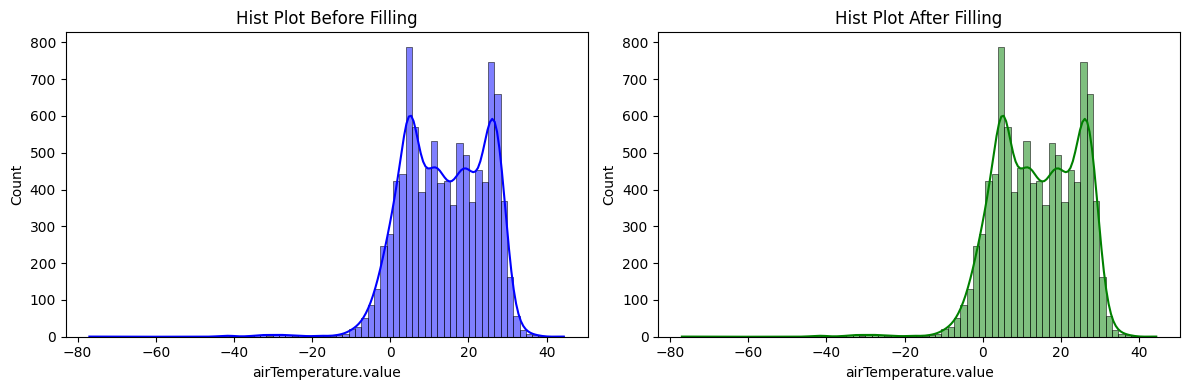

In [ ]:
# Create a chart grid with one row and two
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution chart
sns.histplot(merged_df['airTemperature.value'], kde=True, color='blue', label='Before Filling', ax=axes[0])
axes[0].set_title('Hist Plot Before Filling')

sns.histplot(merged_df_filled['airTemperature.value'], kde=True, color='green', label='After Filling', ax=axes[1])
axes[1].set_title('Hist Plot After Filling')

# Set distance between graphs
plt.tight_layout()
plt.show()

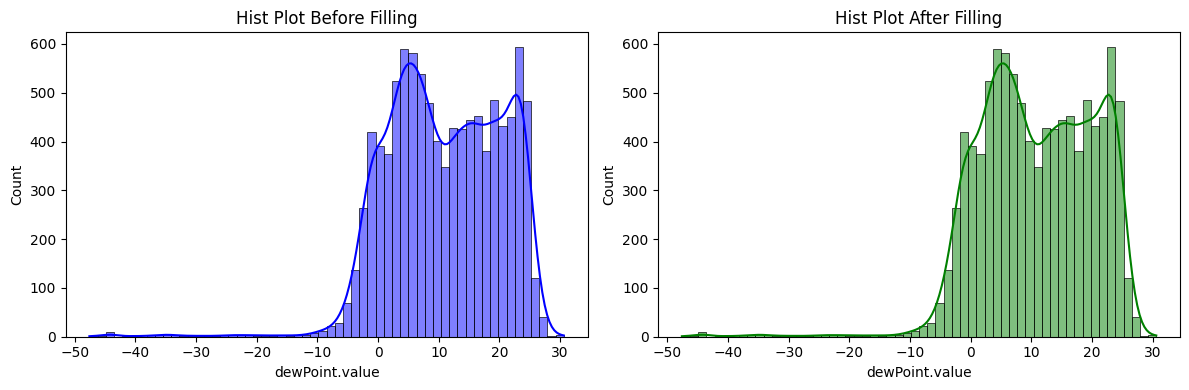

In [ ]:
# Create a chart grid with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution chart
sns.histplot(merged_df['dewPoint.value'], kde=True, color='blue', label='Before Filling', ax=axes[0])
axes[0].set_title('Hist Plot Before Filling')

sns.histplot(merged_df_filled['dewPoint.value'], kde=True, color='green', label='After Filling', ax=axes[1])
axes[1].set_title('Hist Plot After Filling')

# Set distance between graphs
plt.tight_layout()
plt.show()

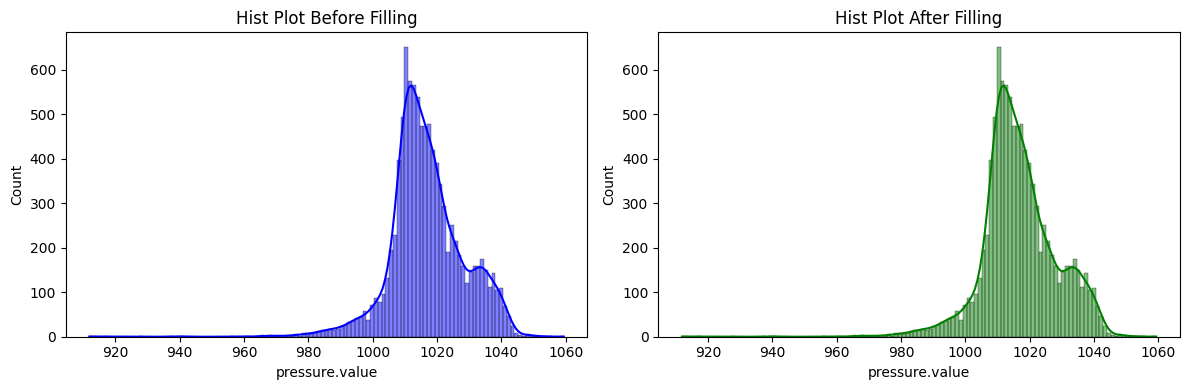

In [ ]:
# Create a chart grid with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution chart
sns.histplot(merged_df['pressure.value'], kde=True, color='blue', label='Before Filling', ax=axes[0])
axes[0].set_title('Hist Plot Before Filling')

sns.histplot(merged_df_filled['pressure.value'], kde=True, color='green', label='After Filling', ax=axes[1])
axes[1].set_title('Hist Plot After Filling')

# Set distance between graphs
plt.tight_layout()
plt.show()

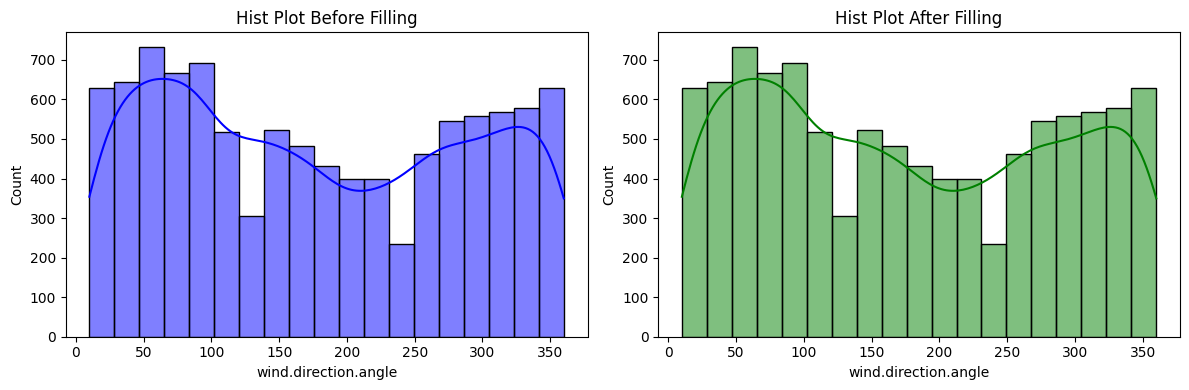

In [ ]:
# Create a chart grid with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution chart
sns.histplot(merged_df['wind.direction.angle'], kde=True, color='blue', label='Before Filling', ax=axes[0])
axes[0].set_title('Hist Plot Before Filling')

sns.histplot(merged_df_filled['wind.direction.angle'], kde=True, color='green', label='After Filling', ax=axes[1])
axes[1].set_title('Hist Plot After Filling')

# Set distance between graphs
plt.tight_layout()
plt.show()

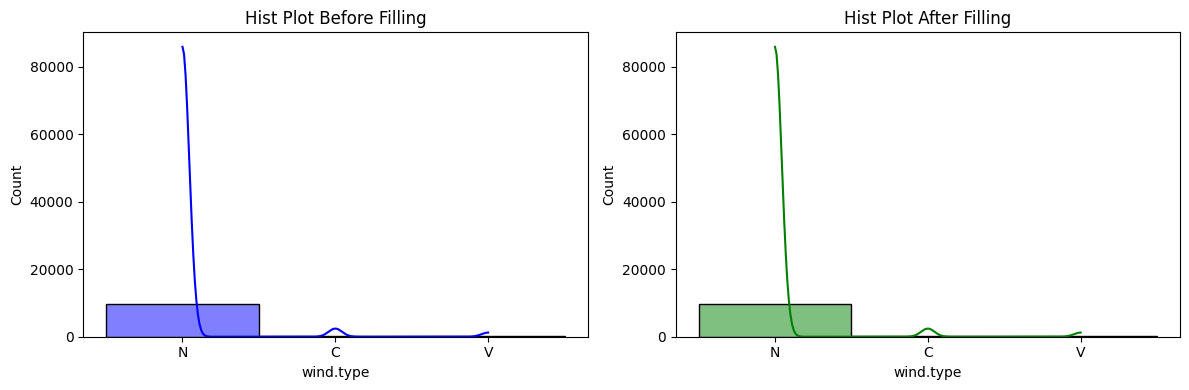

In [ ]:
# Create a chart grid with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution chart
sns.histplot(merged_df['wind.type'], kde=True, color='blue', label='Before Filling', ax=axes[0])
axes[0].set_title('Hist Plot Before Filling')

sns.histplot(merged_df_filled['wind.type'], kde=True, color='green', label='After Filling', ax=axes[1])
axes[1].set_title('Hist Plot After Filling')

# Set distance between graphs
plt.tight_layout()
plt.show()

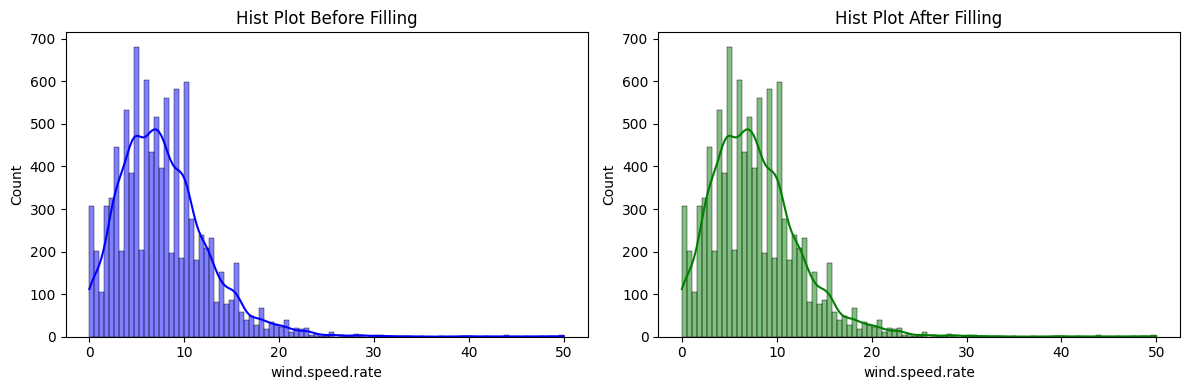

In [ ]:
# Create a chart grid with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution chart
sns.histplot(merged_df['wind.speed.rate'], kde=True, color='blue', label='Before Filling', ax=axes[0])
axes[0].set_title('Hist Plot Before Filling')

sns.histplot(merged_df_filled['wind.speed.rate'], kde=True, color='green', label='After Filling', ax=axes[1])
axes[1].set_title('Hist Plot After Filling')

# Set distance between graphs
plt.tight_layout()
plt.show()

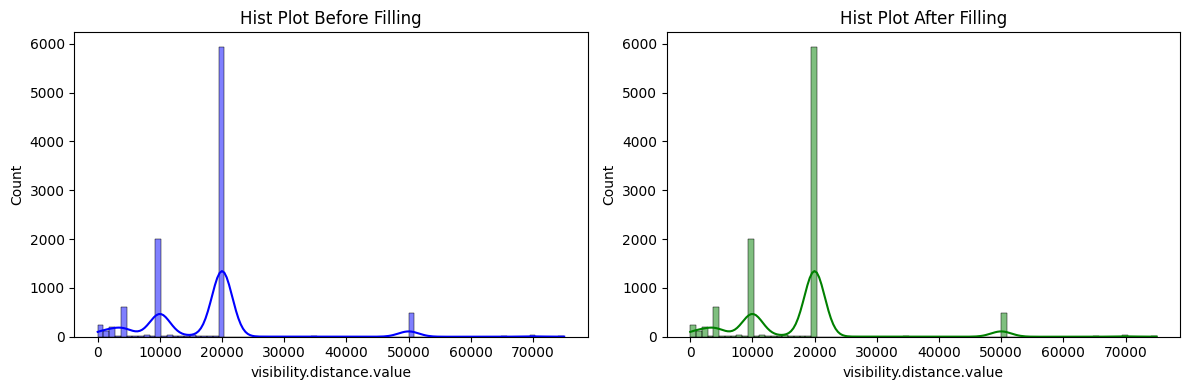

In [ ]:
# Create a chart grid with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution chart
sns.histplot(merged_df['visibility.distance.value'], kde=True, color='blue', label='Before Filling', ax=axes[0])
axes[0].set_title('Hist Plot Before Filling')

sns.histplot(merged_df_filled['visibility.distance.value'], kde=True, color='green', label='After Filling', ax=axes[1])
axes[1].set_title('Hist Plot After Filling')

# Set distance between graphs
plt.tight_layout()
plt.show()

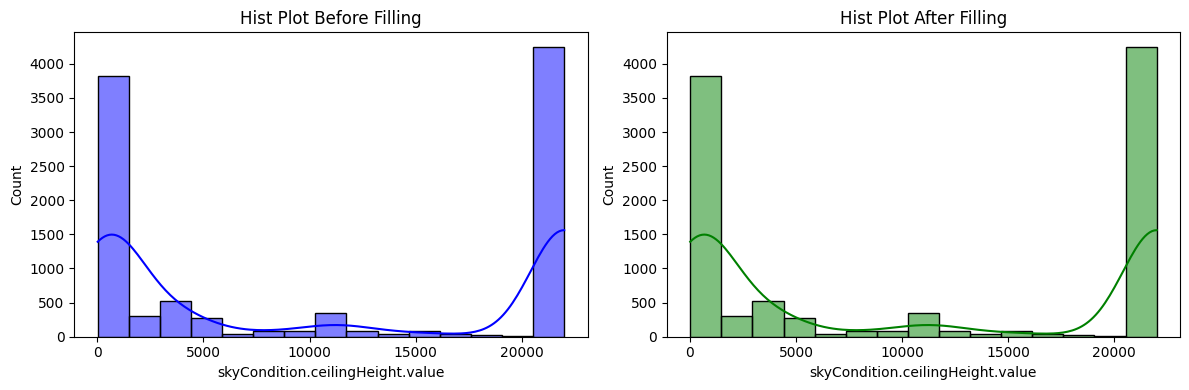

In [ ]:
# Create a chart grid with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution chart
sns.histplot(merged_df['skyCondition.ceilingHeight.value'], kde=True, color='blue', label='Before Filling', ax=axes[0])
axes[0].set_title('Hist Plot Before Filling')

sns.histplot(merged_df_filled['skyCondition.ceilingHeight.value'], kde=True, color='green', label='After Filling', ax=axes[1])
axes[1].set_title('Hist Plot After Filling')

# Set distance between graphs
plt.tight_layout()
plt.show()

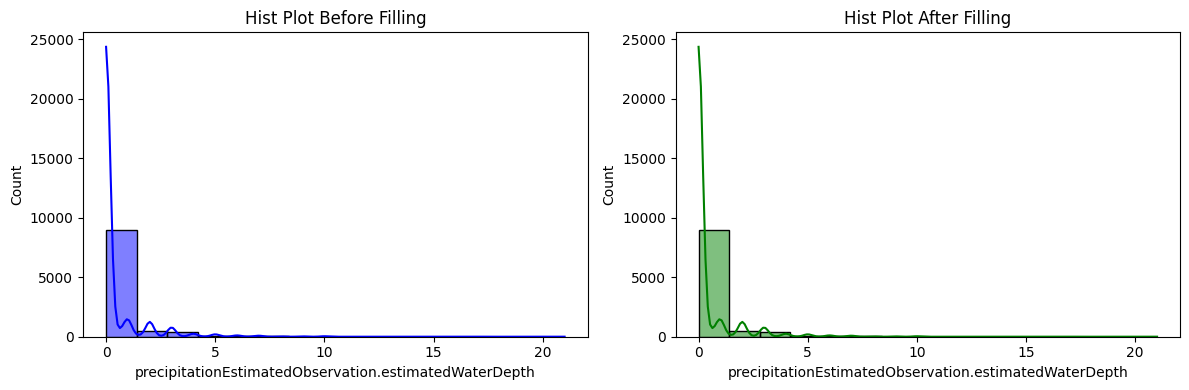

In [ ]:
# Create a chart grid with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution chart
sns.histplot(merged_df['precipitationEstimatedObservation.estimatedWaterDepth'], kde=True, color='blue', label='Before Filling', ax=axes[0])
axes[0].set_title('Hist Plot Before Filling')

sns.histplot(merged_df_filled['precipitationEstimatedObservation.estimatedWaterDepth'], kde=True, color='green', label='After Filling', ax=axes[1])
axes[1].set_title('Hist Plot After Filling')

# Set distance between graphs
plt.tight_layout()
plt.show()

#### 6.3.3.8 Create a new weather_df table after processing the data

In [ ]:
weather_df = merged_df_filled[['weather_ID', 'station_ID', 'time_ID', 'airTemperature.value', 'dewPoint.value',
       'pressure.value', 'wind.direction.angle', 'wind.type',
       'wind.speed.rate', 'visibility.distance.value',
       'skyCondition.ceilingHeight.value',
       'precipitationEstimatedObservation.estimatedWaterDepth']]

# Assuming weather_df is your DataFrame
weather_df.reset_index(drop=True, inplace=True)
weather_df

,weather_ID,station_ID,time_ID,airTemperature.value,dewPoint.value,pressure.value,wind.direction.angle,wind.type,wind.speed.rate,visibility.distance.value,skyCondition.ceilingHeight.value,precipitationEstimatedObservation.estimatedWaterDepth
0,WE18914,ST17511,TI10136,25.0,24.0,1010.8,20.0,N,2.6,10000.0,22000.0,0.0
1,WE19832,ST18268,TI10136,25.0,22.0,1009.6,70.0,N,4.6,20000.0,22000.0,0.0
2,WE11885,ST11692,TI10006,25.3,21.7,1008.9,75.0,N,2.8,20000.0,22000.0,0.0
3,WE15475,ST14710,TI10088,25.4,22.0,1009.9,80.0,N,1.0,70000.0,10500.0,0.0
4,WE19705,ST18153,TI10154,30.5,25.9,1009.5,70.0,N,2.6,20000.0,4500.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,WE16875,ST15882,TI10082,8.6,23.0,993.4,260.0,N,19.0,10000.0,3600.0,0.0
9990,WE11123,ST11040,TI10006,12.0,23.0,1016.3,270.0,N,8.0,4000.0,120.0,0.0
9991,WE18942,ST17537,TI10148,13.0,23.0,996.3,330.0,N,13.0,4000.0,240.0,0.0
9992,WE17407,ST16309,TI10154,25.0,23.0,1017.6,340.0,N,10.0,20000.0,22000.0,0.0


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   weather_ID                                             9994 non-null   object 
 1   station_ID                                             9994 non-null   object 
 2   time_ID                                                9994 non-null   object 
 3   airTemperature.value                                   9994 non-null   float64
 4   dewPoint.value                                         9994 non-null   float64
 5   pressure.value                                         9994 non-null   float64
 6   wind.direction.angle                                   9994 non-null   float64
 7   wind.type                                              9994 non-null   object 
 8   wind.speed.rate                                 

# Step 7: Insert data into SQL

## 7.1 Insert TimeTree table data into SQL

In [ ]:
# SQL server name
# pyodbc.drivers()

In [ ]:
# import library pyodbc
import pyodbc

# Create conx variable, fill in server SQL name, database name, UID and PWD if any
conx = pyodbc.connect('DRIVER={SQL Server};'
                     'SERVER=LAPTOP-TT1SNMLA;'
                     'DATABASE=Bigday;'
                     'Trusted_Connection=yes;'
                    #  'UID=your_username;'
                    #  'PWD=your_password'
                      )

# Create pointer variable
cursor = conx.cursor()

In [ ]:
# Execute INSERT commands
for index, row in time_df.iterrows():
        cursor.execute("INSERT INTO TimeTree (time_ID, year, month, day, hour) VALUES (?, ?, ?, ?, ?)",
                       row['time_ID'], row['year'], row['month'], row['day'], row['hour'])
    # Save changes
        conx.commit()

In [ ]:
# Close the cursor object and connection (if exists)
cursor.close()
conx.close()

## 7.2 Insert LOCATION table data into SQL

In [ ]:
# import library pyodbc
import pyodbc

# Create conx variable, fill in server SQL name, database name, UID and PWD if any
conx = pyodbc.connect('DRIVER={SQL Server};'
                     'SERVER=LAPTOP-TT1SNMLA;'
                     'DATABASE=Bigday;'
                     'Trusted_Connection=yes;'
                    #  'UID=your_username;'
                    #  'PWD=your_password'
                      )

# Create pointer variable
cursor = conx.cursor()

In [ ]:
# Execute INSERT commands
for index, row in station_dfR.iterrows():
        cursor.execute("INSERT INTO LOCATION (Longitude, Latitude, station_ID, Cluster, Cluster_level2) VALUES (?, ?, ?, ?, ?)",
                    row['Longitude'], row['Latitude'], row['station_ID'], row['Cluster'], row['Level2'])
    # Save changes
        conx.commit()

In [ ]:
# Close the cursor object and connection (if exists)
cursor.close()
conx.close()

## 7.3 Insert MEASUREMENTS table data into SQL

### 7.3.1 Rename columns

In [ ]:
weather_df.columns

In [ ]:
# Function to rename columns with '.' into '_'
def rename_columns(column_name):
    return column_name.replace('.','_')

weather_df.rename(columns=rename_columns, inplace = True)

weather_df.columns

### 7.3.2 Convert data type is object to string type

In [ ]:
weather_df.dtypes

In [ ]:
weather_df['wind_type'] = weather_df['wind_type'].astype(str)

### 7.3.3 Insert data

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import pyodbc

# Connection information to SQL Server
server = 'LAPTOP-TT1SNMLA'
database = 'Bigday'
#username = 'DoAn_HK1'
#password = '12345'

# Create connection string
conn_str = f'mssql+pyodbc://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'

# Create a connection object to the database
engine = create_engine(conn_str)

# Table name in SQL Server
table_name = 'MEASUREMENTS'

# Chunksize (number of rows inserted each time)
chunksize = 1000

# Split DataFrame into small parts and insert into SQL Server
weather_df.to_sql(name=table_name,
                   con=engine, if_exists='append',
                    index=False, chunksize=chunksize)


# Step 8: Export files for data analysis with R

In [ ]:
#merged_df_filled.to_csv("D:\\DOAB\\Fill NA\\merged_df_FillNA2.csv", index=False)